In [1]:
import cv2
import sys
import math
import random
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
sys.setrecursionlimit(1000000)

In [2]:
colors = []
for i in range(300):
    colors.append(np.array([random.randint(0,255),random.randint(0,255),random.randint(0,255)]))

def color_it(img1,c):
    img=np.zeros((img1.shape[0],img1.shape[1]))
    img3=np.zeros((img1.shape[0],img1.shape[1],3),dtype=np.uint8)
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            if img1[i][j] in c:
                img[i][j]=255
                for k in range(3):
                    img3[i][j][k]=colors[int(img1[i][j])][k]
    # plt.imshow(img3)
    # plt.show()
    return img,img3

def dfs22(i,j,img,re,vis,c):
    global ctr
    if(i<0 or i>=img.shape[0] or j<0 or j>=img.shape[1] or vis[i][j]==1 or img[i][j]==0):
        return 1
    else:
        vis[i][j]=1
        re[i][j]=c
        vall=0
        if img[i][j]!=0:
            vall+=dfs22(i+1,j,img,re,vis,c)
            vall+=dfs22(i-1,j,img,re,vis,c)
            vall+=dfs22(i,j+1,img,re,vis,c)
            vall+=dfs22(i,j-1,img,re,vis,c)
            vall+=dfs22(i+1,j+1,img,re,vis,c)
            vall+=dfs22(i-1,j-1,img,re,vis,c)
            vall+=dfs22(i-1,j+1,img,re,vis,c)
            vall+=dfs22(i+1,j-1,img,re,vis,c)
        return vall

def count_obj2(img,co=255):
    cc = 1
    dd = []
    re = np.zeros((img.shape[0],img.shape[1]))
    vi = np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if vi[i][j]==0 and img[i][j]==co:
                kkk=[]
                kkk.append(dfs22(i,j,img,re,vi,cc))
                kkk.append(cc-1)
                dd.append(kkk)
                cc+=1
    return cc-1,dd,re


In [3]:
def join_disconnected(array_img_path,thr=3000,ret=False):
    img_arr=[]
    for i in array_img_path:
        img = cv2.imread(i)
        j=i.replace("output_trial_new","joined_trial_new")
        img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img_th=cv2.threshold(img_gray,50,255,cv2.THRESH_BINARY)[1]
        img_d=cv2.dilate(img_th,None,iterations=3)
        # plt.imshow(img_d,cmap="gray")
        # plt.show()
        aa,bb,re=count_obj2(img_d,255)
        bbb=[x[0] for x in bb]
        aaa=[]
        aab=[]
        for i in bb:
            if i[0]>thr:
                aaa.append(i[0])
                aab.append(i[1]+1)
        imgc,img3c=color_it(re,aab)
        plt.imsave(j,img3c)
        img_arr.append(img3c)
    if ret:
        return img_arr

In [4]:
arry=[]
for i in range(1,241):
    arry.append("../output_trial_new/region{}.jpg".format(i))

In [ ]:
join_disconnected(arry)

# SCRAPE from here (Ignore but don't delete)

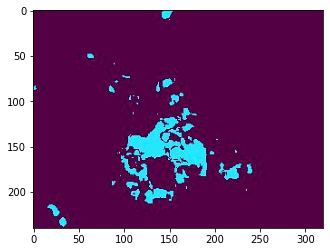

In [4]:
img=cv2.imread("../output_trial_new/region39.jpg")
plt.imshow(img)
plt.show()

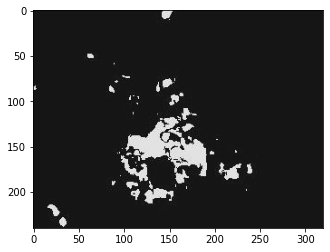

In [5]:
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap='gray')
plt.show()

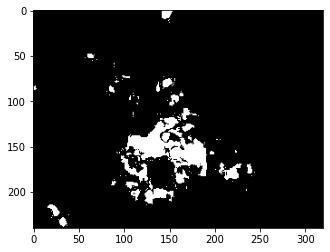

In [6]:
img_th=cv2.threshold(img_gray,50,255,cv2.THRESH_BINARY)[1]
plt.imshow(img_th,cmap='gray')
plt.show()

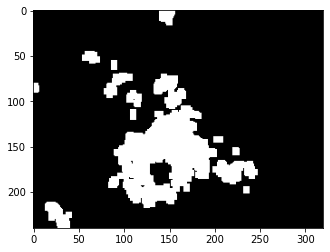

In [7]:
# img_e=cv2.erode(img_th,None,iterations=3)
img_d=cv2.dilate(img_th,None,iterations=3)
# plt.imshow(img_e,cmap='gray')
# plt.show()
plt.imshow(img_d,cmap='gray')
plt.show()

In [55]:

thr=2000
aa,bb,re=count_obj2(img_d,255)
bbb=[x[0] for x in bb]
aaa=[]
aab=[]
for i in bb:
    if i[0]>2000:
        aaa.append(i[0])
        aab.append(i[1]+1)
print("Number of cluster:",len(aaa))
print(aab)
px.line(bbb)

Number of cluster: 5
[4, 5, 8, 12, 14]


In [23]:
aab

[4, 5, 8, 12, 14]

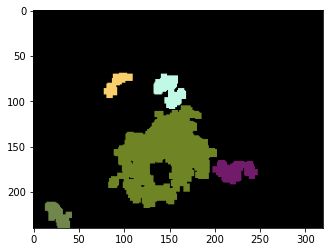

In [58]:
aa,aaa=color_it(re,aab)